# Dataset

In [1]:
from kaggle.api.kaggle_api_extended import KaggleApi

# Instantiate the Kaggle API
api = KaggleApi()

# Download the dataset
api.dataset_download_files('datasnaek/chess', path='../data', unzip=True)

Dataset URL: https://www.kaggle.com/datasets/datasnaek/chess


In [2]:
import pandas as pd 

data = pd.read_csv('../data/games.csv')
data.head()

,id,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply
0,TZJHLljE,False,1.504210e+12,1.504210e+12,13,outoftime,white,15+2,bourgris,1500,a-00,1191,d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...,D10,Slav Defense: Exchange Variation,5
1,l1NXvwaE,True,1.504130e+12,1.504130e+12,16,resign,black,5+10,a-00,1322,skinnerua,1261,d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...,B00,Nimzowitsch Defense: Kennedy Variation,4
2,mIICvQHh,True,1.504130e+12,1.504130e+12,61,mate,white,5+10,ischia,1496,a-00,1500,e4 e5 d3 d6 Be3 c6 Be2 b5 Nd2 a5 a4 c5 axb5 Nc...,C20,King's Pawn Game: Leonardis Variation,3
3,kWKvrqYL,True,1.504110e+12,1.504110e+12,61,mate,white,20+0,daniamurashov,1439,adivanov2009,1454,d4 d5 Nf3 Bf5 Nc3 Nf6 Bf4 Ng4 e3 Nc6 Be2 Qd7 O...,D02,Queen's Pawn Game: Zukertort Variation,3
4,9tXo1AUZ,True,1.504030e+12,1.504030e+12,95,mate,white,30+3,nik221107,1523,adivanov2009,1469,e4 e5 Nf3 d6 d4 Nc6 d5 Nb4 a3 Na6 Nc3 Be7 b4 N...,C41,Philidor Defense,5


# Encode Board (2d array) vs Time

## Function to generate board states from list of moves

In [3]:
import chess
import numpy as np

def generate_board_states(moves):
    board = chess.Board()
    board_states = []

    for move in moves.split():
        board.push_san(move)
        board_state = np.array([[str(board.piece_at(chess.square(file, rank))) if board.piece_at(chess.square(file, rank)) else '.' for file in range(8)] for rank in range(7, -1, -1)])
        board_states.append(board_state)

    return board_states

## Create new df column

In [4]:
data['board_states'] = data['moves'].apply(generate_board_states)
data['board_states']

0        [[[r, n, b, q, k, b, n, r], [p, p, p, p, p, p,...
1        [[[r, n, b, q, k, b, n, r], [p, p, p, p, p, p,...
2        [[[r, n, b, q, k, b, n, r], [p, p, p, p, p, p,...
3        [[[r, n, b, q, k, b, n, r], [p, p, p, p, p, p,...
4        [[[r, n, b, q, k, b, n, r], [p, p, p, p, p, p,...
                               ...                        
20053    [[[r, n, b, q, k, b, n, r], [p, p, p, p, p, p,...
20054    [[[r, n, b, q, k, b, n, r], [p, p, p, p, p, p,...
20055    [[[r, n, b, q, k, b, n, r], [p, p, p, p, p, p,...
20056    [[[r, n, b, q, k, b, n, r], [p, p, p, p, p, p,...
20057    [[[r, n, b, q, k, b, n, r], [p, p, p, p, p, p,...
Name: board_states, Length: 20058, dtype: object

## Visualize One Game

In [5]:
import matplotlib.pyplot as plt
import numpy as np

def plot_board_state(board_state, ax=None):
    # Define the color map for pieces
    piece_to_color = {
        'P': 'white', 'N': 'white', 'B': 'white', 'R': 'white', 'Q': 'white', 'K': 'white',
        'p': 'black', 'n': 'black', 'b': 'black', 'r': 'black', 'q': 'black', 'k': 'black',
        '.': 'none'
    }
    
    # Create an empty 8x8 grid with alternating colors for the squares
    grid = np.zeros((8, 8, 3))
    for i in range(8):
        for j in range(8):
            if (i + j) % 2 == 0:
                grid[i, j] = [1, 1, 1]  # white square
            else:
                grid[i, j] = [0.6, 0.6, 0.6]  # black square

    # Plot the pieces on the board
    if ax is None:
        fig, ax = plt.subplots()
    ax.imshow(grid)
    
    for i in range(8):
        for j in range(8):
            piece = board_state[i][j]
            if piece != '.':
                ax.text(j, i, piece, ha='center', va='center', fontsize=24, color=piece_to_color[piece])
    
    ax.set_xticks([])
    ax.set_yticks([])

    return ax


In [6]:
import math

def plot_game_in_grid(board_states, n_cols=5):
    n_moves = len(board_states)
    n_rows = math.ceil(n_moves / n_cols)

    fig, axs = plt.subplots(n_rows, n_cols, figsize=(n_cols * 4, n_rows * 4))
    axs = axs.flatten()

    for i in range(n_moves):
        plot_board_state(board_states[i], ax=axs[i])

    for j in range(i + 1, len(axs)):
        axs[j].axis('off')

    plt.tight_layout()
    plt.show()

id                                                         qwU9rasv
rated                                                          True
created_at                                          1504230000000.0
last_move_at                                        1504230000000.0
turns                                                            33
victory_status                                               resign
winner                                                        white
increment_code                                                 10+0
white_id                                                    capa_jr
white_rating                                                   1520
black_id                                         daniel_likes_chess
black_rating                                                   1423
moves             d4 d5 e4 dxe4 Nc3 Nf6 f3 exf3 Nxf3 Nc6 Bb5 a6 ...
opening_eco                                                     D00
opening_name             Blackmar-Diemer Gambit:

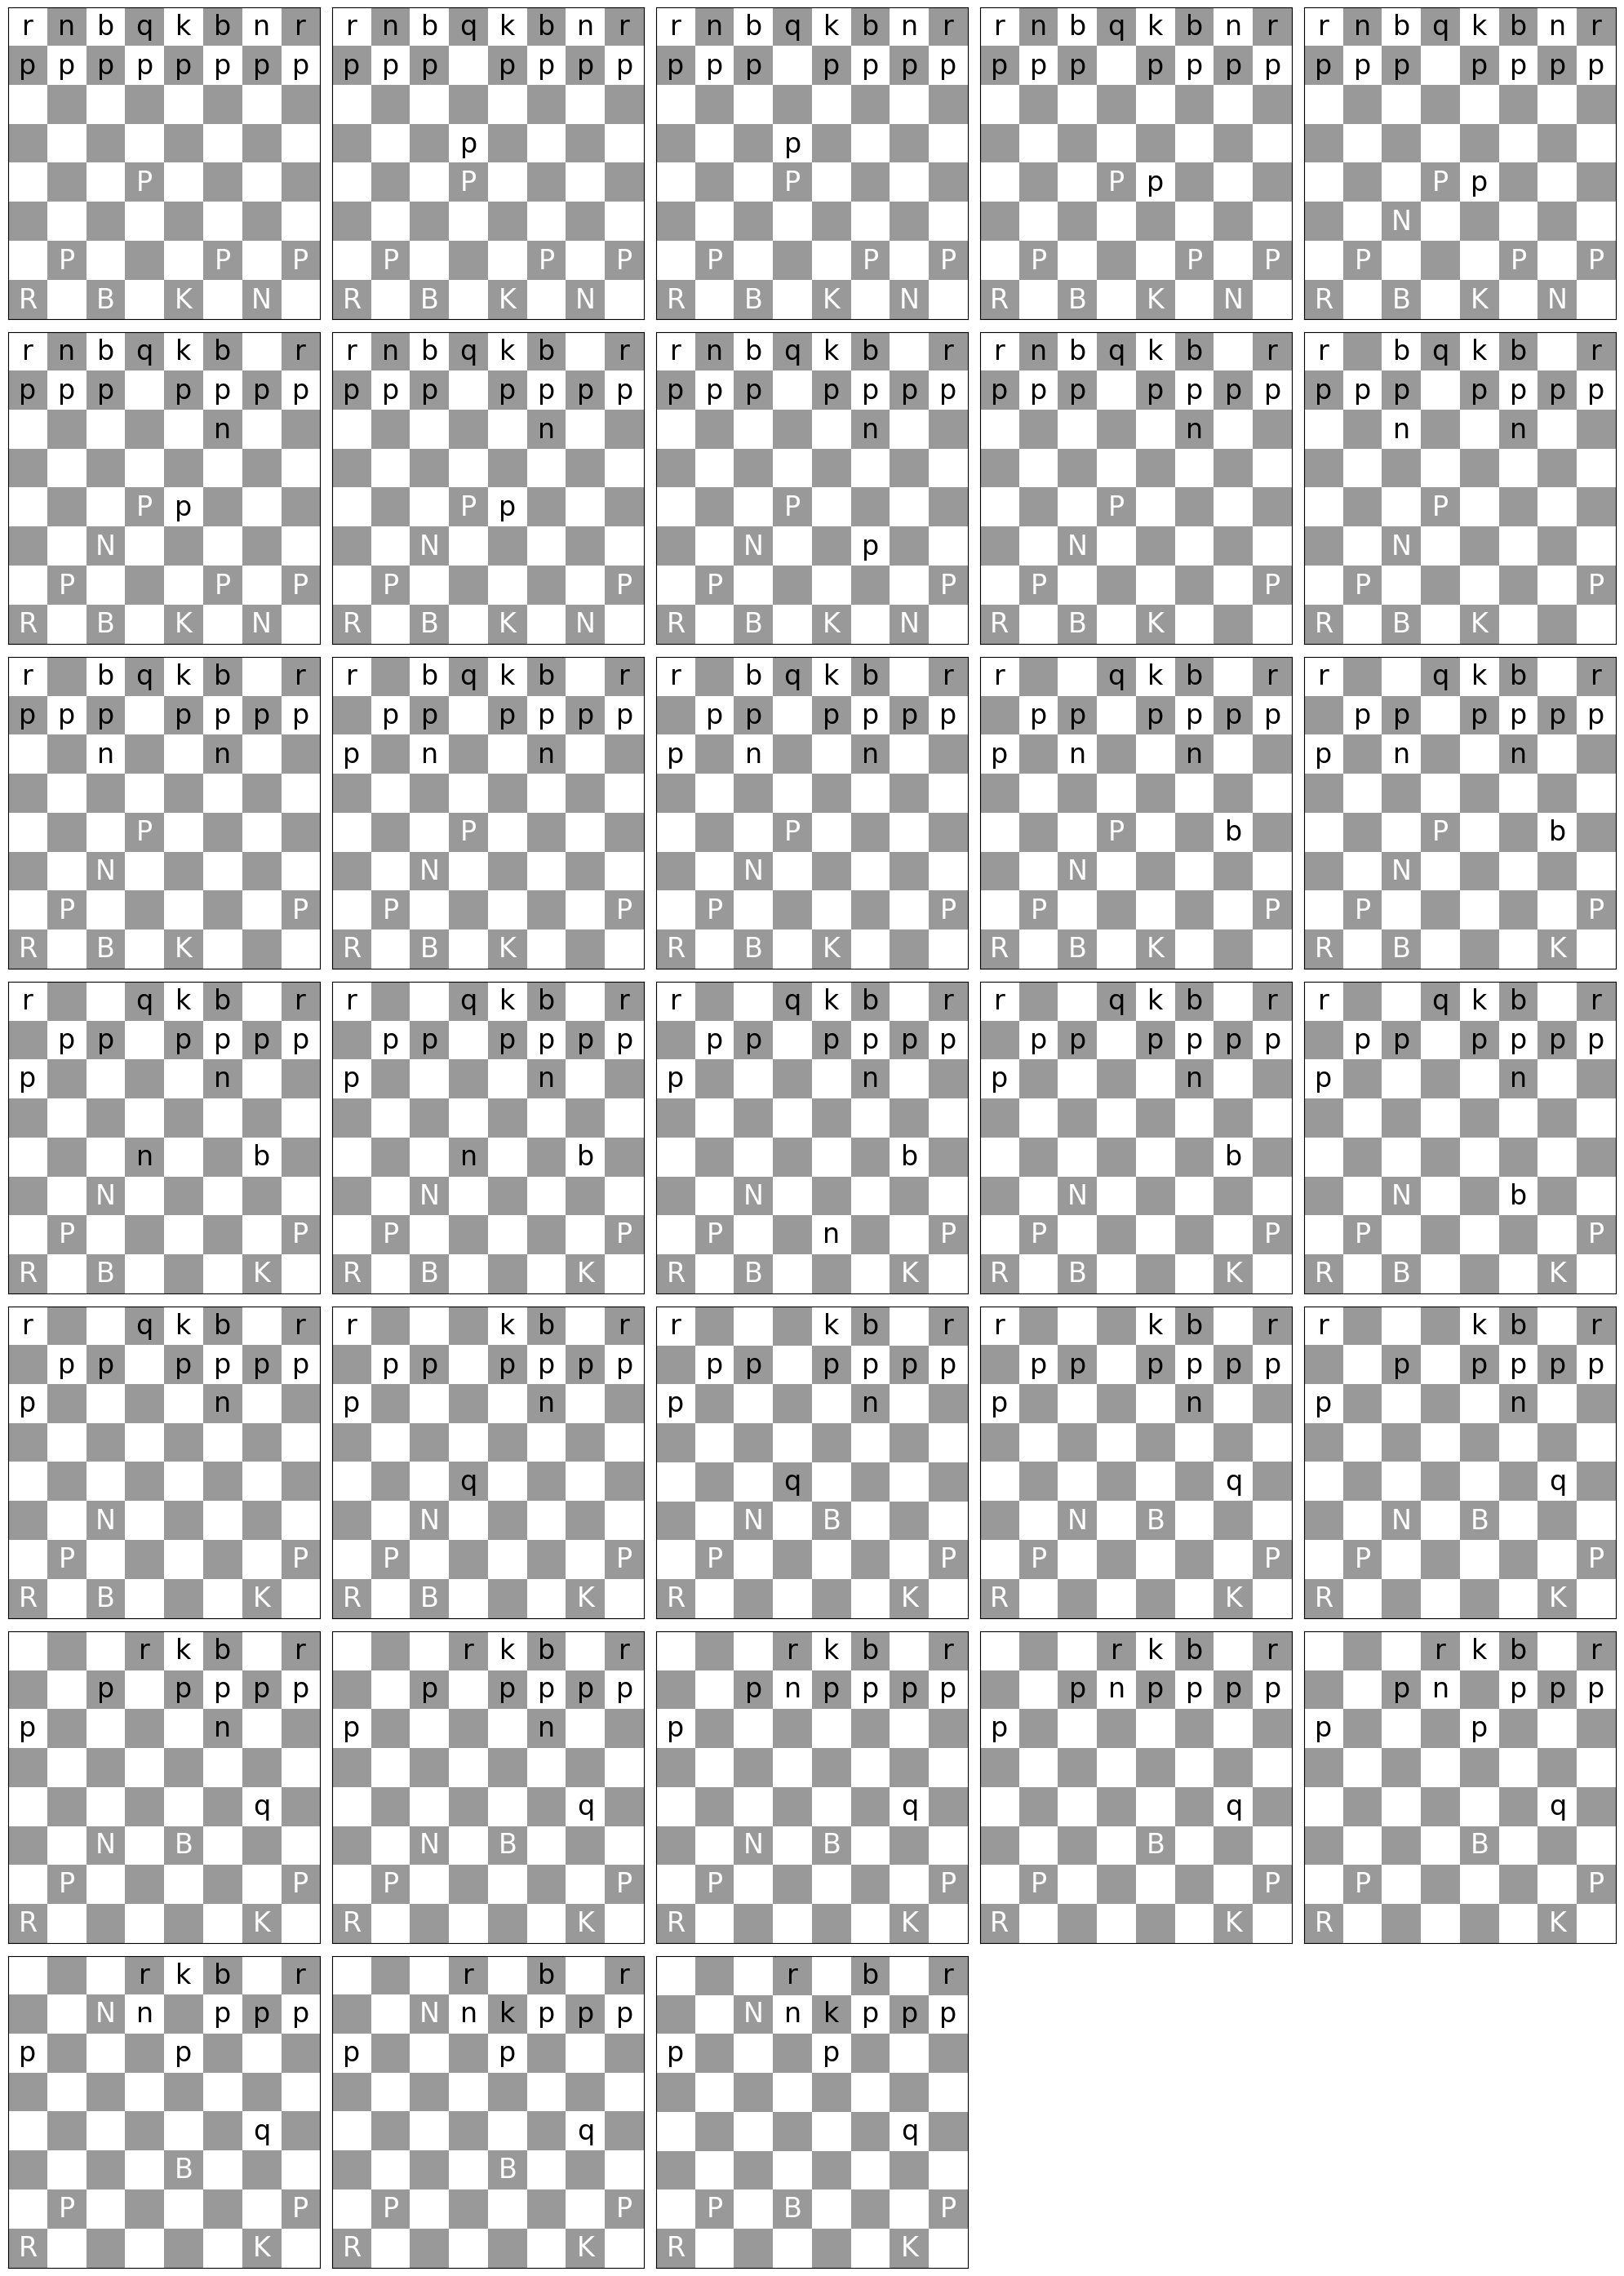

In [7]:
# Get the board states of the first game
game_number = 6
display(data.iloc[game_number])
first_game_board_states = data['board_states'].iloc[game_number]

# Plot the game in a grid
plot_game_in_grid(first_game_board_states, n_cols=5)


# Encode Board (FEN) vs Time

## Function to generate FEN states from list of moves

In [8]:
import chess

def generate_fen_states(moves):
    board = chess.Board()
    fen_states = []

    for move in moves.split():
        board.push_san(move)
        fen_states.append(board.fen())  # Get the FEN string after each move

    return fen_states

## Create new df column

In [9]:
data['fen_states'] = data['moves'].apply(generate_fen_states)
data['fen_states']

0        [rnbqkbnr/pppppppp/8/8/3P4/8/PPP1PPPP/RNBQKBNR...
1        [rnbqkbnr/pppppppp/8/8/3P4/8/PPP1PPPP/RNBQKBNR...
2        [rnbqkbnr/pppppppp/8/8/4P3/8/PPPP1PPP/RNBQKBNR...
3        [rnbqkbnr/pppppppp/8/8/3P4/8/PPP1PPPP/RNBQKBNR...
4        [rnbqkbnr/pppppppp/8/8/4P3/8/PPPP1PPP/RNBQKBNR...
                               ...                        
20053    [rnbqkbnr/pppppppp/8/8/3P4/8/PPP1PPPP/RNBQKBNR...
20054    [rnbqkbnr/pppppppp/8/8/3P4/8/PPP1PPPP/RNBQKBNR...
20055    [rnbqkbnr/pppppppp/8/8/3P4/8/PPP1PPPP/RNBQKBNR...
20056    [rnbqkbnr/pppppppp/8/8/4P3/8/PPPP1PPP/RNBQKBNR...
20057    [rnbqkbnr/pppppppp/8/8/3P4/8/PPP1PPPP/RNBQKBNR...
Name: fen_states, Length: 20058, dtype: object

## Visualize One Game

In [10]:
import chess
import matplotlib.pyplot as plt
import numpy as np

def plot_fen_state(fen, ax=None):
    board = chess.Board(fen)
    
    # Define the color map for pieces
    piece_to_color = {
        'P': 'white', 'N': 'white', 'B': 'white', 'R': 'white', 'Q': 'white', 'K': 'white',
        'p': 'black', 'n': 'black', 'b': 'black', 'r': 'black', 'q': 'black', 'k': 'black',
        '.': 'none'
    }
    
    # Create an empty 8x8 grid with alternating colors for the squares
    grid = np.zeros((8, 8, 3))
    for i in range(8):
        for j in range(8):
            if (i + j) % 2 == 0:
                grid[i, j] = [1, 1, 1]  # white square
            else:
                grid[i, j] = [0.6, 0.6, 0.6]  # black square

    # Plot the pieces on the board
    if ax is None:
        fig, ax = plt.subplots()
    ax.imshow(grid)
    
    for i in range(8):
        for j in range(8):
            square = chess.square(j, 7-i)  # Convert row, column to square index
            piece = board.piece_at(square)
            if piece:
                ax.text(j, i, piece.symbol(), ha='center', va='center', fontsize=24, color=piece_to_color[piece.symbol()])
    
    ax.set_xticks([])
    ax.set_yticks([])

    return ax

In [11]:
import math

def plot_game_fen_in_grid(fen_states, n_cols=5):
    n_moves = len(fen_states)
    n_rows = math.ceil(n_moves / n_cols)

    fig, axs = plt.subplots(n_rows, n_cols, figsize=(n_cols * 4, n_rows * 4))
    axs = axs.flatten()

    for i in range(n_moves):
        plot_fen_state(fen_states[i], ax=axs[i])

    for j in range(i + 1, len(axs)):
        axs[j].axis('off')

    plt.tight_layout()
    plt.show()

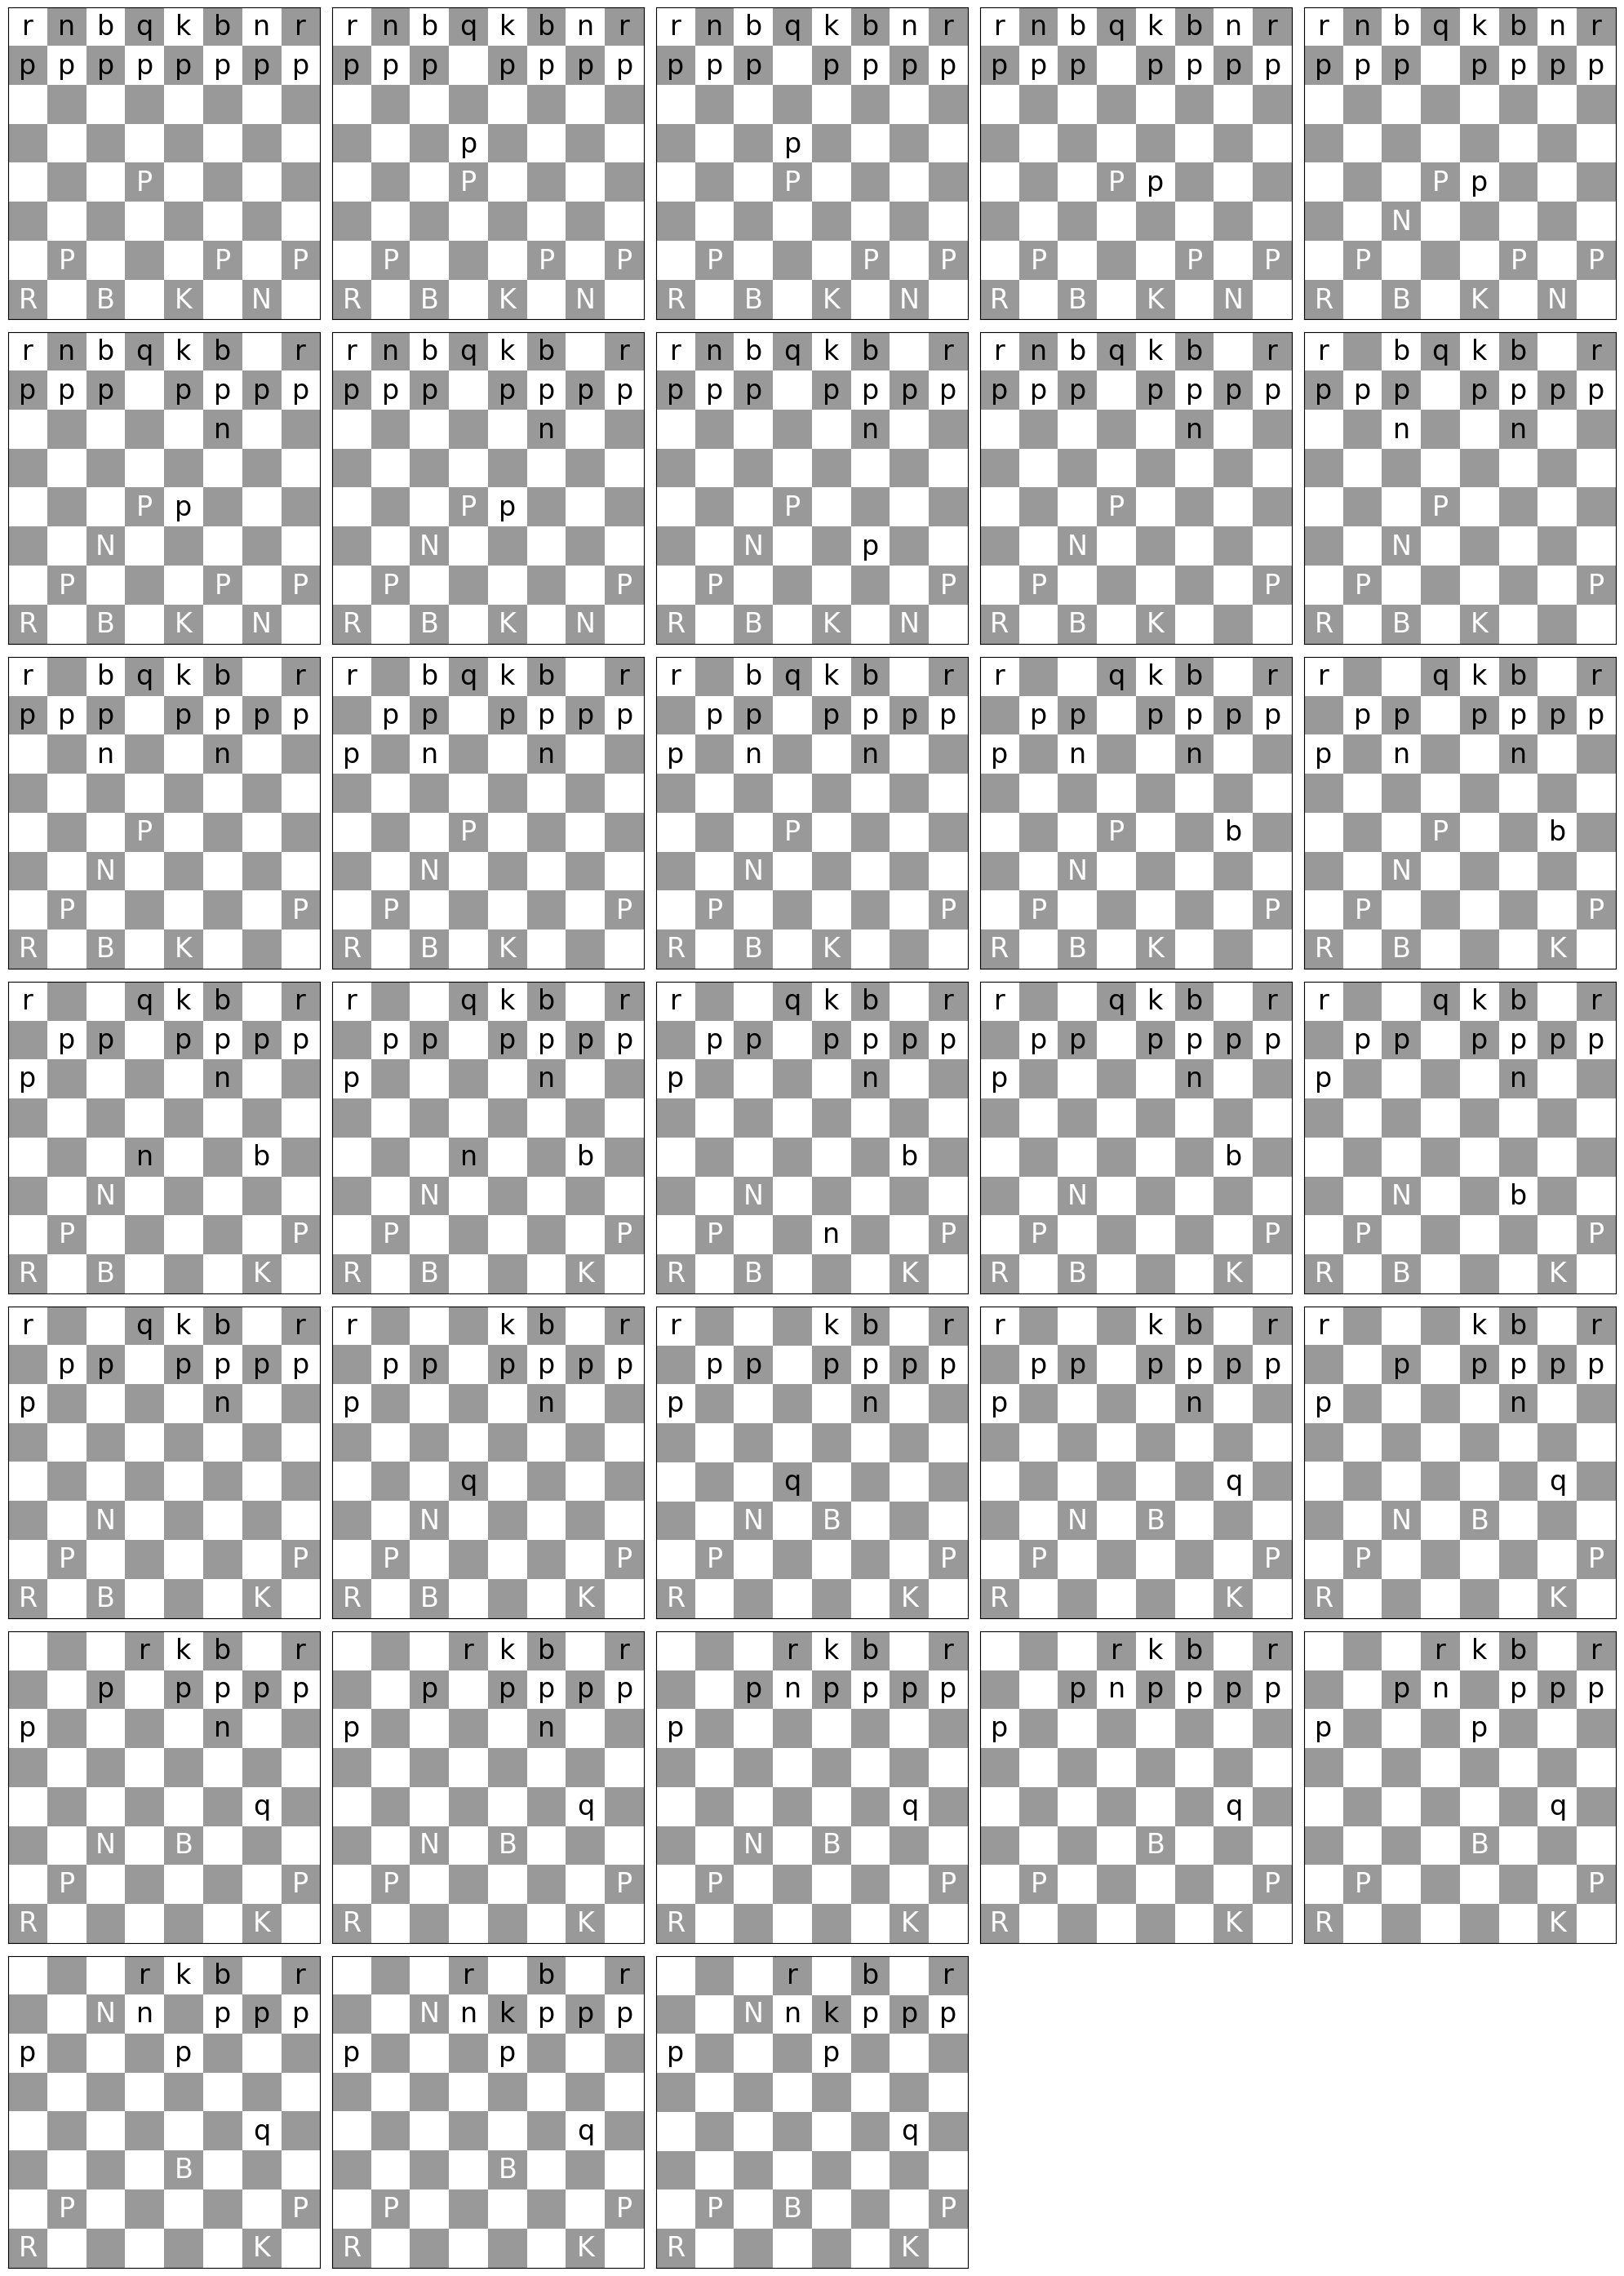

In [12]:
# Get the FEN states of the specified game
game_number = 6
fen_states = data['fen_states'].iloc[game_number]

# Plot the game in a grid
plot_game_fen_in_grid(fen_states, n_cols=5)

# Comparing Encoding Methods
GPT4o: Comparing Chess Board Encodings: 8x8 NumPy Array vs. FEN Notation

1. Memory Efficiency
8x8 NumPy Array Encoding:
Each board position is represented as an 8x8 array, with each element corresponding to a piece or an empty square.
Assuming each piece is represented by a single character (e.g., 'P', 'k', '.'), the memory usage is 64 bytes per board state.
Over a full game (average of 40 moves), the total memory required would be 64 bytes * 40 = 2560 bytes.
FEN Encoding:
FEN (Forsyth-Edwards Notation) represents a board state using a concise string. The typical FEN string length is around 50-80 characters.
For the same 40-move game, using an average FEN length of 65 characters, the total memory required would be 65 bytes * 40 = 2600 bytes.
FEN also encodes additional game state information (active player, castling rights, en passant, etc.).
Summary: While the memory usage might be similar, FEN provides a richer representation by encoding additional game state information in fewer characters.

2. Representation Size
8x8 NumPy Array:
The array explicitly stores the position of each piece, which is redundant for empty squares. For example, a starting position with 32 pieces uses the full 64 bytes, even though only half the squares are occupied.
The representation is straightforward but lacks other aspects of the game, such as castling rights or whose turn it is, without additional variables.
FEN Encoding:
FEN is a compact, standardized notation that avoids storing empty squares explicitly and includes other important game information.
The compactness and completeness of FEN make it more efficient in terms of information density.
Summary: FEN is more efficient in terms of representation size, especially considering the extra information it encodes without needing additional variables.

3. Suitability for Machine Learning Models
8x8 NumPy Array:
NumPy arrays are directly compatible with many ML models, particularly convolutional neural networks (CNNs), which can process 2D grid-like data.
However, they lack information about the game state beyond piece positions, which might be relevant for learning complex strategies.
FEN Encoding:
FEN strings are not directly usable by most ML models without preprocessing (e.g., converting FEN to a one-hot encoding or embedding).
FEN encapsulates more contextual information (such as castling rights and en passant), which might be valuable for training more sophisticated models.
FEN also allows easier integration with pre-existing chess engines or databases that use this standard notation.
Summary: The 8x8 NumPy array is better suited for simpler models like CNNs that operate on grid-like data, while FEN provides a more comprehensive representation that could be leveraged by models that can process structured text data or embeddings.

4. Preservation of Game State
8x8 NumPy Array:
Captures only piece positions and misses important game state information (e.g., castling rights, en passant target square, move counts).
Could lead to incomplete training data for models that require full game context.
FEN Encoding:
Preserves the full game state, including dynamic aspects like castling rights and turn information.
Ensures that the model is trained on a more complete and accurate representation of the game.
Summary: FEN better preserves the correct and complete game state, which is crucial for training models that need to understand the intricacies of chess beyond just piece positions.

Conclusion
Efficiency: FEN is more efficient in terms of information density and memory usage when considering the additional game state information it encapsulates.
ML Model Compatibility: While NumPy arrays may be more straightforward for certain ML models, FEN provides a richer and more detailed encoding that could benefit models designed to handle structured data.
Preservation of Game State: FEN ensures that all relevant aspects of the game state are preserved, making it a more accurate and complete encoding method.
If you're aiming for a balance between efficiency and the richness of the game representation, FEN encoding is likely the better choice, especially for more advanced models or if you plan to incorporate additional game state information into your training.

## 1. Memory Efficiency Visualization

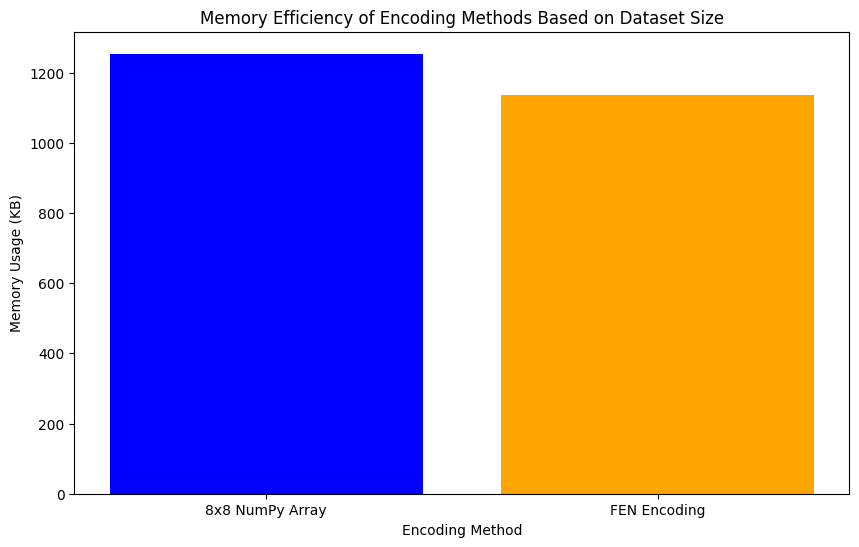

In [13]:
num_rows = data.shape[0]

# Calculate memory usage for 8x8 NumPy array encoding
# Each 8x8 array is 64 bytes
numpy_array_size_per_state = 64
numpy_memory_usage = numpy_array_size_per_state * num_rows / 1024  # Convert to kilobytes (KB)

# Calculate average FEN length
fen_lengths = data['fen_states'].apply(lambda x: len(x[0]))  # Assuming each entry in 'fen_states' is a list of FEN strings
average_fen_length = fen_lengths.mean()
fen_memory_usage = average_fen_length * num_rows / 1024  # Convert to kilobytes (KB)

# Plot memory usage
labels = ['8x8 NumPy Array', 'FEN Encoding']
memory_usage = [numpy_memory_usage, fen_memory_usage]

plt.figure(figsize=(10, 6))
plt.bar(labels, memory_usage, color=['blue', 'orange'])
plt.xlabel('Encoding Method')
plt.ylabel('Memory Usage (KB)')
plt.title('Memory Efficiency of Encoding Methods Based on Dataset Size')
plt.show()

## 2. Representation Size Visualization

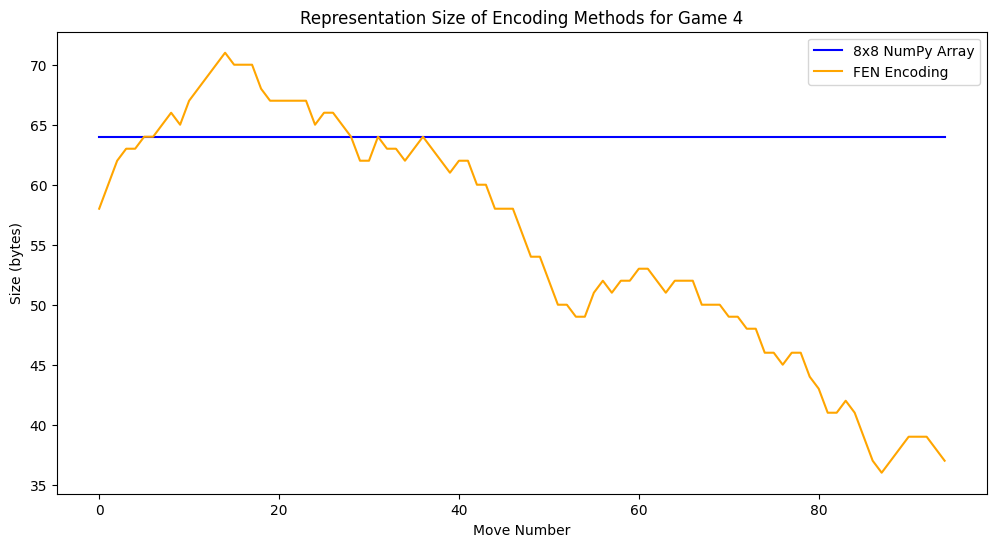

In [14]:
game_number = 4
first_game_fen_lengths = data['fen_states'].iloc[game_number]
num_moves = len(first_game_fen_lengths)

# Size of each representation
numpy_array_size_per_state = 64
fen_sizes = [len(fen) for fen in first_game_fen_lengths]

# Plot representation size
plt.figure(figsize=(12, 6))
plt.plot(range(num_moves), [numpy_array_size_per_state] * num_moves, label='8x8 NumPy Array', color='blue')
plt.plot(range(num_moves), fen_sizes, label='FEN Encoding', color='orange')
plt.xlabel('Move Number')
plt.ylabel('Size (bytes)')
plt.title(f'Representation Size of Encoding Methods for Game {game_number}')
plt.legend()
plt.show()